<a id="Title"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>Kidney CT Scan Dataset: Normal, Cyst, Tumor, and Stone Classification</b></div>

<a id="description"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>Project Description</b></div>


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid RoyalBlue;">
    <p>
        This dataset provides a collection of kidney CT scans, categorized into four distinct classes: Normal, Cyst, Tumor, and Stone. The dataset is designed for medical image analysis, specifically for the classification of kidney conditions. By analyzing the scans, machine learning models can be trained to detect abnormalities in kidney tissues, aiding in the early diagnosis and treatment of renal diseases. Below are the descriptions of each class:
        
<strong>Class Descriptions:</strong>

<strong>Normal:</strong> CT scans showing healthy kidney tissues without any signs of abnormalities. These scans serve as the baseline for comparison against pathological conditions.


<strong>Cyst:</strong> Scans that display the presence of fluid-filled sacs (cysts) within or on the kidneys. While typically benign, cysts may require monitoring or intervention if complications arise.


<strong>Tumor:</strong> CT images showcasing the presence of abnormal cell growth in the kidney, indicating potential malignancies such as renal cell carcinoma. Tumors are often identified by their irregular shape and density variations.


<strong>Stone:</strong> Scans that capture kidney stones, hard mineral deposits that form in the kidneys, potentially leading to pain, blockages, or infections if untreated.

</p>
</div>


<a id="About"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>About Author</b></div>
 
 
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid RoyalBlue;">
    <p>
        I am <b>Atif Ali Khokhar</b>, a passionate data scientist dedicated to mastering machine learning techniques and continually expanding my knowledge base. I believe in the mantra of #KeepLearning and #KeepSupporting, as I am committed to constant growth and uplifting others in the field.
    </p>
    <div style="text-align: center;">
        <img src="https://media.licdn.com/dms/image/v2/D4D03AQEiSPQK_wGW3g/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1710665268547?e=1735171200&v=beta&t=FxRc00H874TsrD0Wb05gIDalBS_d_uOOXYa66P5elPQ" alt="Profile Picture" style="width: 100px; height: 100px; border-radius: 50%; border: 2px solid #F1C40F;"><br>
    </div>
    <p>
        You can find more about me on my:<br>
        <a href="https://www.linkedin.com/in/atifalikhokhar/" target="_blank">LinkedIn</a>.<br>
        <a href="https://www.kaggle.com/atifaliak" target="_blank">Kaggle</a>.<br>
        Feel free to connect and reach out for any collaboration or queries!
    </p>
</div>

<a id="Contents"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b> Table of Contents </b></div>

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid RoyalBlue;">

- <a href="#1">1. Importing Libraries</a>
    
- <a href="#2">2. Loading the Dataset</a> 

- <a href="#3">3. Image Visualizations</a>

- <a href="#4">4. Modeling</a>
    - <a href="#4.1">4.1. Model Architecture</a> 
    - <a href="#4.2">4.2. Model Summary</a>
    - <a href="#4.3">4.3. Model Compilation</a>
    - <a href="#4.4">4.4. Model Training</a>
     

- <a href="#5">5. Plotting Graphs for Accuracy and loss</a>
    - <a href="#5.1">5.1. Training Accuracy VS Validation Accuracy</a> 
    - <a href="#5.2">5.2. Training Loss VS Validation Loss</a>
    
</div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>1. Importing Libraries</b></div>

In [70]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory

import os
import random

import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>2. Loading the Dataset</b></div>

In [71]:
# Set seed for reproducibility
seed = 123

# Create the train dataset with a validation split
train_ds = keras.utils.image_dataset_from_directory(
    directory=r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256, 256),
    validation_split=0.2,
    subset='training',
    seed=seed
)

# Create the validation (test) dataset
test_ds = keras.utils.image_dataset_from_directory(
    directory=r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256, 256),
    validation_split=0.2,
    subset='validation',
    seed=seed  
)


Found 12446 files belonging to 4 classes.
Using 9957 files for training.
Found 12446 files belonging to 4 classes.
Using 2489 files for validation.


<a id="3"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>3. Visualizing the Images</b></div>

In [72]:
def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [73]:
# Extrating the class labels
classes = train_ds.class_names

CYST


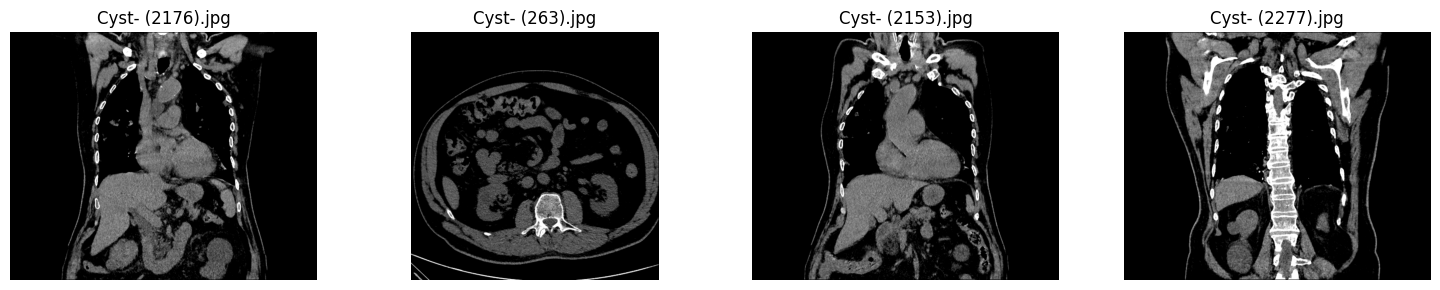

NORMAL


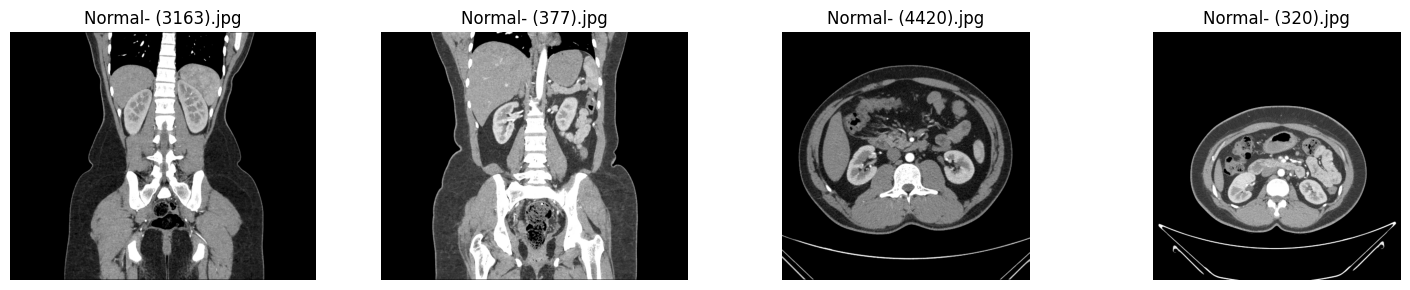

STONE


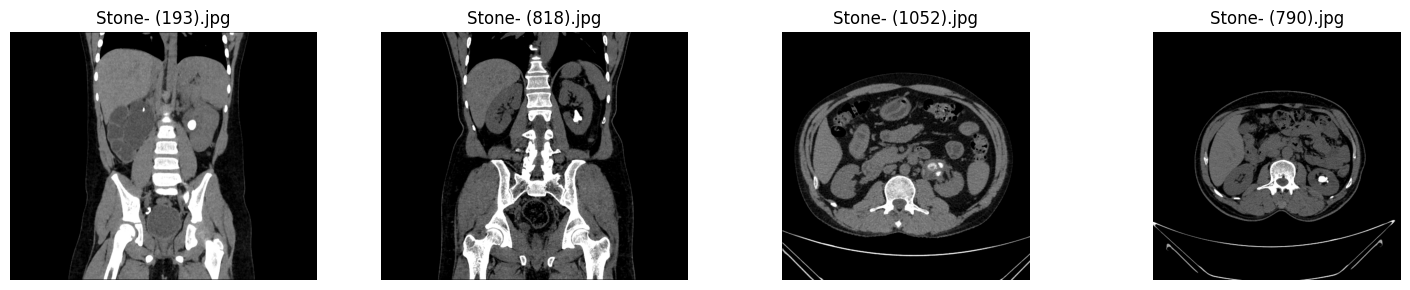

TUMOR


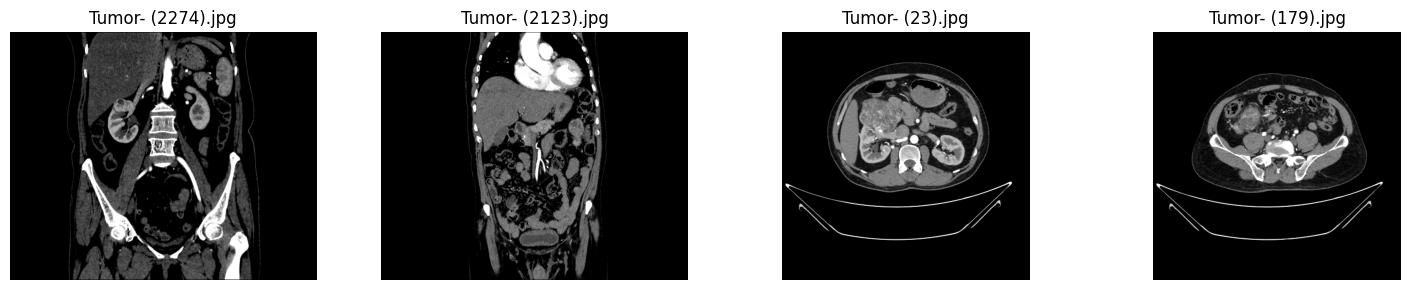

In [74]:
# Iterating through each class to plot its images
for label in classes:
    
    # Specify the path containing the images to visualize
    path_to_visualize = f"/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/{label}"

    # Visualize 3 random images
    print(label.upper())
    visualize_images(path_to_visualize, num_images=4)

<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>4. Modeling</b></div>

<a id="4.1"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>4.1. Building Model Architecture</b></div>

In [80]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3, 3),activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64,kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(4, activation='softmax'))

<a id="4.2"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>4.2. Model Summary</b></div>

In [81]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │    15,745,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,767,076 (60.15 MB)

 Trainable params: 15,766,884 (60.15 MB)

 Non-trainable params: 192 (768.00 B)

<a id="4.3"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>4.3. Model Compilation</b></div>

In [82]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

<a id="4.4"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>4.4. Training the Model</b></div>

In [83]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds, verbose=1)

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 28s 144ms/step - accuracy: 0.7967 - loss: 4.8261 - val_accuracy: 0.9341 - val_loss: 0.4888
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - accuracy: 0.9602 - loss: 0.3591 - val_accuracy: 0.9892 - val_loss: 0.0705
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - accuracy: 0.9801 - loss: 0.2179 - val_accuracy: 0.9948 - val_loss: 0.0217
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - accuracy: 0.9854 - loss: 0.1512 - val_accuracy: 0.9952 - val_loss: 0.0366
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 120ms/step - accuracy: 0.9884 - loss: 0.1265 - val_accuracy: 0.9964 - val_loss: 0.0177
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.9893 - loss: 0.0897 - val_accuracy: 0.9988 - val_loss: 0.0037
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - accuracy: 0.9890 - loss: 0.1367 - val_accuracy: 0.9976 - val_loss: 0.0357
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 120ms/step - accuracy: 0.9891 - loss: 0

<a id="5"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>5. Ploting Graph of Accuracy and Loss</b></div>

<a id="5.1"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>5.1. Training Accuracy VS Validation Accuracy</b></div>

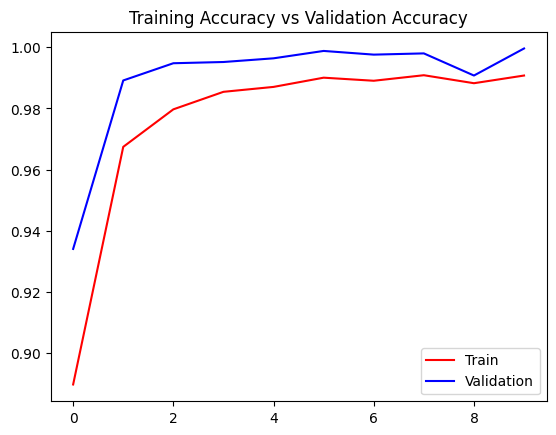

In [84]:
plt.title('Training Accuracy vs Validation Accuracy')

plt.plot(history.history['accuracy'], color='red',label='Train')
plt.plot(history.history['val_accuracy'], color='blue',label='Validation')

plt.legend()

<a id="5.2"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>5.2. Training loss VS Validation loss</b></div>

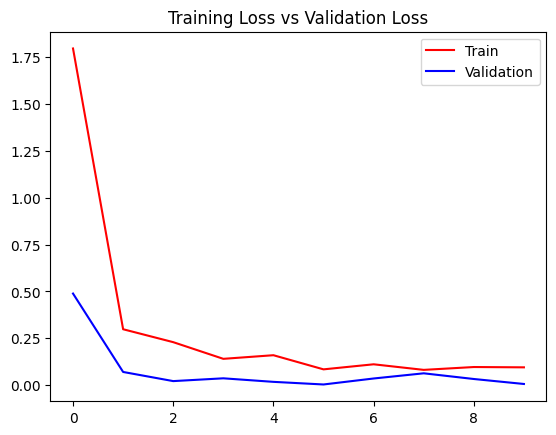

In [85]:
plt.title('Training Loss vs Validation Loss')

plt.plot(history.history['loss'], color='red',label='Train')
plt.plot(history.history['val_loss'], color='blue',label='Validation')

plt.legend()

<a id="Thanks"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:RoyalBlue; overflow:hidden"><b>Thanks for visiting Notebook</b></div>